<a href="https://colab.research.google.com/github/VanenB/My-Project/blob/main/MY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting feature importance
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.preprocessing import StandardScaler  # To scale numerical features
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
import tensorflow as tf  # For building neural network
from tensorflow.keras.models import Sequential  # Sequential model for neural network
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('EPL.csv', encoding='latin1')
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['FTHG'].fillna(df['FTHG'].mean(), inplace=True)

/tmp/ipython-input-5-3018751294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FTHG'].fillna(df['FTHG'].mean(), inplace=True)


In [6]:
df['FTAG'].fillna(df['FTAG'].mean(), inplace=True)

/tmp/ipython-input-6-2359975104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FTAG'].fillna(df['FTAG'].mean(), inplace=True)


In [7]:
def calculate_match_form(row, team, df, window=5):
    """Calculates the form (points from last window matches) for a team for a specific match."""
    # Get matches for the team before the current match
    team_matches = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_matches = team_matches[team_matches.index < row.name].tail(window)

    points = 0
    for _, match in team_matches.iterrows():
        if match['HomeTeam'] == team and match['FTR'] == 'H':
            points += 3
        elif match['AwayTeam'] == team and match['FTR'] == 'A':
            points += 3
        elif match['FTR'] == 'D':
            points += 1
    return points

df['home_form'] = df.apply(lambda row: calculate_match_form(row, row['HomeTeam'], df), axis=1)
df['away_form'] = df.apply(lambda row: calculate_match_form(row, row['AwayTeam'], df), axis=1)

# Check if there are any missing values after calculation
print("Missing values in 'home_form' after calculation:", df['home_form'].isnull().sum())
print("Missing values in 'away_form' after calculation:", df['away_form'].isnull().sum())

# Fill any remaining missing values if necessary (using the assignment method)
# df['home_form'] = df['home_form'].fillna(df['home_form'].mean())
# df['away_form'] = df['away_form'].fillna(df['away_form'].mean())

display(df[['HomeTeam', 'AwayTeam', 'FTR', 'home_form', 'away_form']].head())

Missing values in 'home_form' after calculation: 0
Missing values in 'away_form' after calculation: 0


,HomeTeam,AwayTeam,FTR,home_form,away_form
0,Arsenal,Coventry,A,0,0
1,Aston Villa,QPR,H,0,0
2,Chelsea,Blackburn,A,0,0
3,Liverpool,Sheffield Weds,H,0,0
4,Man City,Leeds,D,0,0


In [8]:
df['home_form'].fillna(df['home_form'].mean(), inplace=True)
df['away_form'].fillna(df['away_form'].mean(), inplace=True)

/tmp/ipython-input-8-3466838549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_form'].fillna(df['home_form'].mean(), inplace=True)
/tmp/ipython-input-8-3466838549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [9]:
df['FTR'] = df['FTR'].map({'H': 0, 'D': 1, 'A': 2})

In [10]:
X = df.drop(['FTR', 'DateTime', 'Season', 'HomeTeam', 'AwayTeam', 'HTR', 'Referee', 'FTHG', 'FTAG'], axis=1)
y = df['FTR']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
X_train.shape

(10001, 16)

In [13]:
y_train.shape

(10001,)

In [14]:
model = LogisticRegression()

In [15]:
print("Missing values in X_train before imputation:")
print(X_train.isnull().sum())

# Fill missing values in X_train and X_test with the mean of the respective column in X_train
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # Use mean from X_train to avoid data leakage

print("\nMissing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train before imputation:
HTHG          830
HTAG          830
HS           2536
AS           2536
HST          2536
AST          2536
HC           2536
AC           2536
HF           2536
AF           2536
HY           2536
AY           2536
HR           2536
AR           2536
home_form       0
away_form       0
dtype: int64

Missing values in X_train after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64

Missing values in X_test after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64


In [16]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.score(X_test, y_test)*100

60.431654676258994

In [18]:
pred = model.predict(X_test)

In [19]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.60431654676259


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       490
           1       0.42      0.22      0.29       294
           2       0.64      0.64      0.64       328

    accuracy                           0.60      1112
   macro avg       0.56      0.56      0.55      1112
weighted avg       0.58      0.60      0.58      1112



In [22]:
print("Classification Report:\n", classification_report(y_test, pred, target_names=['Home', 'Draw', 'Away']))

Classification Report:
               precision    recall  f1-score   support

        Home       0.64      0.81      0.71       490
        Draw       0.42      0.22      0.29       294
        Away       0.64      0.64      0.64       328

    accuracy                           0.60      1112
   macro avg       0.56      0.56      0.55      1112
weighted avg       0.58      0.60      0.58      1112



In [23]:
X = df.drop(['FTR', 'DateTime', 'Season', 'HomeTeam', 'AwayTeam', 'HTR', 'Referee', 'FTHG', 'FTAG'], axis=1)
y = df['FTR']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Missing values in X_train before imputation:")
print(X_train.isnull().sum())

# Impute missing values in X_train and X_test with the mean of the respective column in X_train
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # Use mean from X_train to avoid data leakage

print("\nMissing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train before imputation:
HTHG          730
HTAG          730
HS           2267
AS           2267
HST          2267
AST          2267
HC           2267
AC           2267
HF           2267
AF           2267
HY           2267
AY           2267
HR           2267
AR           2267
home_form       0
away_form       0
dtype: int64

Missing values in X_train after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64

Missing values in X_test after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64


In [26]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.6095366621682411


In [29]:
classification_rep = classification_report(y_test, pred, target_names=['Home', 'Draw', 'Away'])
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

        Home       0.64      0.81      0.72      1008
        Draw       0.40      0.23      0.30       574
        Away       0.65      0.63      0.64       641

    accuracy                           0.61      2223
   macro avg       0.57      0.56      0.55      2223
weighted avg       0.58      0.61      0.59      2223



In [30]:
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
print("Missing values in X_train before imputation:")
print(X_train.isnull().sum())

# Impute missing values in X_train and X_test with the mean of the respective column in X_train
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # Use mean from X_train to avoid data leakage

print("\nMissing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train before imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64

Missing values in X_train after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64

Missing values in X_test after imputation:
HTHG         0
HTAG         0
HS           0
AS           0
HST          0
AST          0
HC           0
AC           0
HF           0
AF           0
HY           0
AY           0
HR           0
AR           0
home_form    0
away_form    0
dtype: int64


In [ ]:
model_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4497 - loss: 1.9677
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5752 - loss: 0.8988
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5993 - loss: 0.8307
Epoch 4/10
259/278 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 0.8011

In [ ]:
loss, accuracy = model_nn.evaluate(X_test, y_test)

In [ ]:
print(f"Neural Network Accuracy: {accuracy}")

In [36]:
coefs = model.coef_[0]

In [37]:
features = X.columns

In [38]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(features[:10], coefs[:10])  # Plot first 10 features and their coefficients
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Feature Importance (Logistic Regression)')  # Set title
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('feature_importance.png')  # Save plot as PNG
plt.close()

In [40]:
hypothetical_matches = pd.DataFrame({
    'date': ['2025-08-17', '2025-08-17', '2025-08-17'],  # Hypothetical match dates
    'home_team': ['Man United', 'Liverpool', 'Chelsea'],  # Home teams
    'away_team': ['Arsenal', 'Bournemouth', 'Man City'],  # Away teams
    'home_avg_goals': [2.0, 2.5, 1.8],  # Estimated average goals scored (last 5 matches)
    'away_avg_goals': [2.2, 1.3, 2.4],  # Estimated average goals scored (last 5 matches)
    'home_form': [3, 4, 3],  # Estimated wins in last 5 matches
    'away_form': [2, 1, 3]  # Estimated wins in last 5 matches
})

In [41]:
new_data = pd.get_dummies(hypothetical_matches, columns=['home_team', 'away_team'], prefix=['home', 'away'])

In [42]:
new_data = new_data.reindex(columns=X.columns, fill_value=0)

In [46]:
new_data_scaled = scaler.transform(new_data)

In [49]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on training data

# Display the first few rows of the scaled data
print("Scaled X_train:")
print(X_train_scaled[:5])
print("\nScaled X_test:")
print(X_test_scaled[:5])

Scaled X_train:
[[-0.85043811 -0.72032282 -2.09768899  0.35146102 -1.08173178  0.93609429
  -0.776053   -0.33091266 -0.72370025 -0.25156535 -0.40741424 -0.69225562
  -0.29284729 -0.34962176 -1.09937846 -1.48194247]
 [-0.85043811 -0.72032282  1.19261846 -0.91525987  1.33630906 -0.73039384
   1.09992299  0.51971204  1.11096646  0.91111246  0.56284988 -0.69225562
  -0.29284729 -0.34962176  0.37889763  0.31445349]
 [ 1.63641908  0.71820733  2.07003378  0.35146102 -0.04542856  0.10285022
   1.85031339 -2.03216206 -0.41792247  0.62044301  0.56284988 -0.69225562
  -0.29284729 -0.34962176 -1.39503368 -1.48194247]
 [-0.85043811  0.71820733  0.09584931  0.35146102 -0.39086297  1.35271632
  -0.776053   -0.33091266 -0.72370025 -1.12357371 -1.37767836 -0.69225562
  -0.29284729 -0.34962176 -0.21241281  0.31445349]
 [-0.85043811  0.71820733 -1.87833516  0.85814937 -1.42716619  1.76933835
  -0.4008578   0.09439969 -0.72370025 -1.70491262  0.56284988 -0.69225562
  -0.29284729 -0.34962176 -0.80372324  1

In [50]:
predictions = model_nn.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [52]:
import numpy as np

prediction_labels = ['Home' if np.argmax(p) == 0 else 'Draw' if np.argmax(p) == 1 else 'Away' for p in predictions]

In [54]:
print("\nPremier League Match Predictions:")


Premier League Match Predictions:


In [55]:
for i, (home, away, pred) in enumerate(zip(hypothetical_matches['home_team'], hypothetical_matches['away_team'], prediction_labels)):
    print(f"Match {i+1}: {home} vs {away} -> Predicted: {pred}")

Match 1: Man United vs Arsenal -> Predicted: Away
Match 2: Liverpool vs Bournemouth -> Predicted: Away
Match 3: Chelsea vs Man City -> Predicted: Away


In [59]:
def calculate_team_stats(team, matches, n=5):
    team_matches = matches[(matches['HomeTeam'] == team) | (matches['AwayTeam'] == team)].tail(n)
    goals = team_matches.apply(lambda x: x['FTHG'] if x['HomeTeam'] == team else x['FTAG'], axis=1).mean()
    wins = team_matches.apply(lambda x: 1 if ((x['HomeTeam'] == team and x['FTR'] == 'H') or
                                              (x['AwayTeam'] == team and x['FTR'] == 'A')) else 0, axis=1).sum()
    shots = team_matches.apply(lambda x: x['HST'] if x['HomeTeam'] == team else x['AST'], axis=1).mean()  # Shots on target
    return goals, wins, shots
df['home_shots'] = 0.0
df['away_shots'] = 0.0

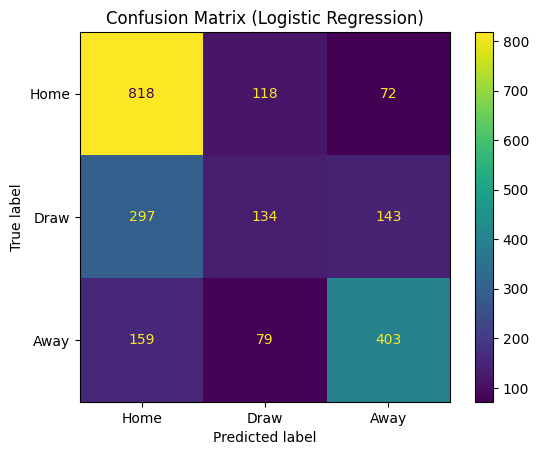

In [65]:
pred_lr = model.predict(X_test)

cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Home', 'Draw', 'Away'])
disp.plot()
plt.title('Confusion Matrix (Logistic Regression)')
plt.savefig('confusion_matrix_lr.png')
plt.show()

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


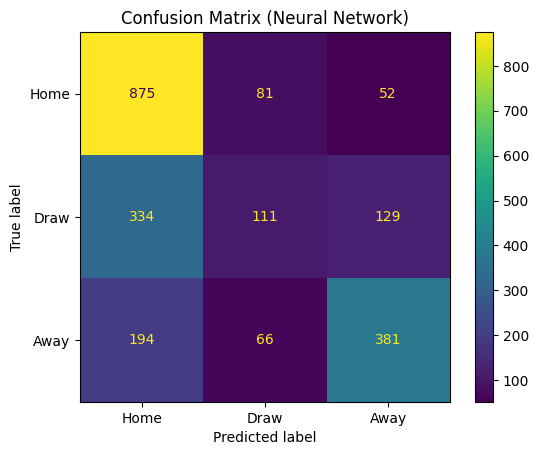

In [66]:
# Generate predictions from the neural network model
pred_nn = model_nn.predict(X_test)
pred_nn_classes = np.argmax(pred_nn, axis=1)

# Calculate and display confusion matrix for the neural network
cm_nn = confusion_matrix(y_test, pred_nn_classes)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['Home', 'Draw', 'Away'])
disp_nn.plot()
plt.title('Confusion Matrix (Neural Network)')
plt.savefig('confusion_matrix_nn.png')
plt.show()